In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# Define the path to the data file
path = r"D:\MyProjects\Python\Andrew Ng_ML_Exercise\python代码\ex1-linear regression\ex1data2.txt"

# Load the data from the file into a pandas DataFrame, specifying the column names
data = pd.read_csv(path,sep=",",names=["size","bedrooms","price"])

# Normalize the data by subtracting the mean and dividing by the standard deviation
data = data.apply(lambda column:(column-column.mean())/column.std())

# Initialize theta as a zero vector with the same number of rows as the number of columns in the data
theta = np.zeros(data.shape[1]).reshape(3,1)

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [86]:
# Define a function to get the feature matrix X from the data
def get_x(data):
    # Add a column of ones to the data for the bias term
    data["ones"] = np.ones(data.shape[0])
    # Return the data as a numpy array
    return data.loc[:,["ones","bedrooms", "size"]].to_numpy()

# Define a function to get the target vector y from the data
def get_y(data):
    # Get the 'price' column from the data and expand its dimensions to make it a 2D array
    y = np.expand_dims(data["price"].to_numpy(), axis=1)
    # Return the target vector
    return y

gte_x.shape:(47, 3)
get_y:(47, 1)


array([[-9.93295281e-17],
       [-5.31788197e-02],
       [ 8.84765988e-01]])

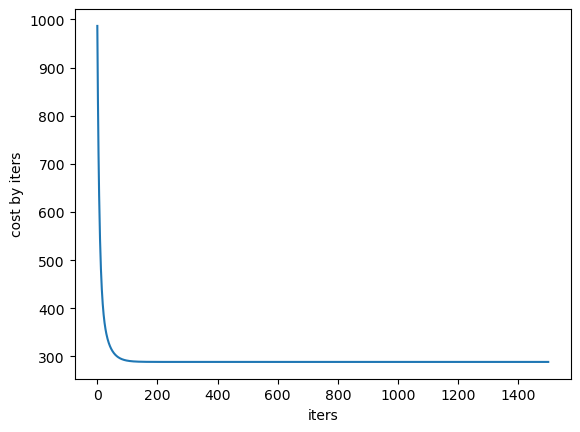

In [106]:
# Define a function to calculate the cost
def cost(data,theta):
    # Get the number of training examples
    m = data.shape[0]
    # Get the feature matrix X
    x = get_x(data)
    # Get the target vector y
    y = get_y(data)
    # Calculate the difference between the predicted and actual values
    inner = x@theta - y
    # Square the difference
    inner = inner.T@inner
    # Return the cost
    return (1/2*m)*inner[0][0]

# Define a function to perform one step of gradient descent
def descent(data,alpha,theta):
    # Get the number of training examples
    m = data.shape[0]
    # Make a copy of theta
    _theta = theta.copy()
    # Get the feature matrix X
    x = get_x(data)
    # Get the target vector y
    y = get_y(data)
    # Update theta
    _theta -= alpha * (1/m)*(x.T@(x@_theta-y))
    # Calculate the current cost
    cu_cost = cost(data,_theta)
    # Return the updated theta and the current cost
    return _theta, cu_cost

# Define a function to perform batch gradient descent
def bath_descent(alpha,data,iters,theta):
    # Create a new figure and a set of subplots
    fig, ax = plt.subplots()
    # Initialize an empty list to store the cost at each iteration
    cost_box=[]
    # Perform gradient descent for a specified number of iterations
    for i in range(iters):
        # Perform one step of gradient descent and get the current cost
        final_theta,cu_cost = descent(data,alpha,theta)
        # Append the current cost to the list
        cost_box.append(cu_cost)
        # Update theta
        theta = final_theta
    # Plot the cost at each iteration
    ax.plot(np.arange(0,iters), cost_box)
    ax.set_xlabel("iters")
    ax.set_ylabel("cost by iters")
    # Return the final theta
    return final_theta

# Call the batch gradient descent function with a learning rate of 0.05, the data, 1500 iterations, and the initial theta
bath_descent(0.05,data,1500,theta)

In [107]:
# Define a tuple with the values for the features
de_data = (1,3,1650)

# Define a function to predict the price based on the theta values and the features
def pre_price(theta,*arg):
    # Convert the features to a numpy array
    data = np.asarray(arg)
    # Calculate the predicted price by multiplying the features with the theta values
    price = data@theta
    # Return the predicted price
    return price

# Call the pre_price function with the final theta values and the features
pre_price(final_theta,de_data)

array([[1459.7043435]])

In [108]:
# Define a function to calculate the optimal values of theta using the normal equation
def formal_func(data):
    # Get the feature matrix X
    x = get_x(data)
    # Get the target vector y
    y = get_y(data)
    # Calculate theta using the normal equation
    theta = np.linalg.inv(x.T@x)@x.T@y
    # Return the optimal values of theta
    return theta

# Call the function with the data to get the optimal values of theta
final_theta = formal_func(data)

# Define a tuple with the values for the features
de_data = (1,3,1650)

# Call the pre_price function with the optimal theta values and the features to predict the price
pre_price(final_theta,de_data)

array([[1459.7043435]])